In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('customer_churn_lab.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 1 Extracting the target variable.

- changing the target column Churn into binary numbers

In [4]:
def binary_churn(object):
    if object == 'Yes':
        return 1
    else:
        return 0
      

In [5]:
y=df['Churn']

In [6]:
y=pd.Series(list(map(binary_churn,y)))

In [7]:
y.unique()

array([0, 1], dtype=int64)

In [29]:
y.value_counts()

0    5174
1    1869
dtype: int64

In [8]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Length: 7043, dtype: int64

### 2 Extract the independent variables and scale them.
  - collect the X axis variables into a series

In [9]:
X=df.drop(['customerID','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','TotalCharges','PaymentMethod','Churn'], axis=1)

In [10]:
X

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


- Scale values

In [11]:
from sklearn.preprocessing import MinMaxScaler as mms

In [16]:
for c in X.columns:
    X[c]=mms().fit_transform(X[c].values.reshape(-1,1))


In [17]:
X

,SeniorCitizen,tenure,MonthlyCharges
0,0.0,0.013889,0.115423
1,0.0,0.472222,0.385075
2,0.0,0.027778,0.354229
3,0.0,0.625000,0.239303
4,0.0,0.027778,0.521891
...,...,...,...
7038,0.0,0.333333,0.662189
7039,0.0,1.000000,0.845274
7040,0.0,0.152778,0.112935
7041,1.0,0.055556,0.558706


In [18]:
y.shape

(7043,)

In [19]:
X.shape

(7043, 3)

### Build the logistic regression model.

In [20]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [23]:
clf=logreg.fit(X_train,y_train)

### Evaluate the model.
- using accuracy score
- confusion matrix

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

In [25]:
y_pred=clf.predict(X_test)

In [26]:
accuracy_score(y_test,y_pred)

0.7827733080927591

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

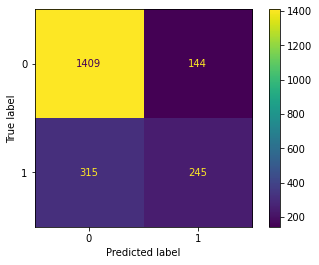

In [28]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

#### Even a simple model will give us more than 70% accuracy. Why?

- accuracy= number of correct predicted samples/ total number of samples
- so it gives us the overall estimate of how well the model is performing, but it contains no information about how good or bad our model is doing on the different classes
- since we have more value counts of 0 or NO from our Churn data
- we are likely to have up to 75% accuracy in our model but cant tell how good it is good in other class TP

In [50]:
y.value_counts()

0    5174
1    1869
dtype: int64

### Trying other methods of measure accuracy and data imbalance

In [31]:
from imblearn.under_sampling import TomekLinks
# using tomek links

In [32]:
tomek=TomekLinks()

In [33]:
X_tl,y_tl=tomek.fit_resample(X,y)


In [34]:
X_train_tl, X_test_tl, y_train_tl, y_test_tl = train_test_split(X_tl, y_tl, test_size=0.3, random_state=40)

In [35]:
clf_tl=logreg.fit(X_train_tl,y_train_tl)

In [36]:
y_pred_tl=clf_tl.predict(X_test_tl)

In [37]:
accuracy_score(y_test_tl,y_pred_tl)

0.7760284408329101

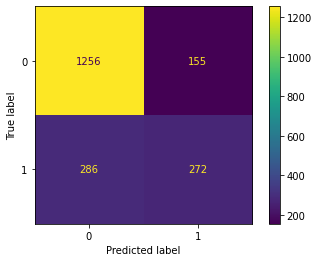

In [38]:
cm = confusion_matrix(y_test_tl, y_pred_tl, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

there is still major imbalance in the classes

In [42]:
from imblearn.over_sampling import SMOTE #using the smote procedure

In [43]:
smote = SMOTE(random_state = 101)

In [44]:
X_smote, y_smote = smote.fit_resample(X,y)

In [45]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3, random_state=40)

In [46]:
clf_smote=logreg.fit(X_train_smote,y_train_smote)

In [47]:
y_pred_smote=clf_smote.predict(X_test_smote)

In [48]:
accuracy_score(y_test_smote,y_pred_smote)

0.7330112721417069

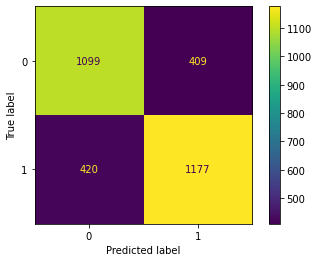

In [49]:
cm = confusion_matrix(y_test_smote, y_pred_smote, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

there is a major shift to the TP class which in overall defines a good model